# Regresion Basica: Predecir eficiencia de gasolina

Este libro usa el set de datos clasico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) y construye un modelo para predecir el consumo de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galon (MPG), que vendría a representar las millas por galón de combustible.

Este ejemplo usa el API `tf.keras` , revise [Esta Guia](https://www.tensorflow.org/guide/keras) para obtener mas detalles.

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

## El set de Datos de MPG

El set de datos esta disponible de el siguiente repositorio [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).

### Obtenga los datos
Primero descargue el set de datos.
keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [59]:
dataset = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset

'C:\\Users\\inilo\\.keras\\datasets\\auto-mpg.data'

Importelo usando pandas.

In [60]:
column_names = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year", "Origin", "Car name"]

In [61]:
df = pd.read_csv(dataset, names=column_names, delim_whitespace=True)
df

C:\Users\inilo\AppData\Local\Temp\ipykernel_2272\4045023703.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(dataset, names=column_names, delim_whitespace=True)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


### Limpia los datos

Trata los missings y variables categóricas

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [63]:
df["Horsepower"] = df["Horsepower"].replace('?', np.nan)

In [64]:
df["Horsepower"] = pd.to_numeric(df["Horsepower"], errors='coerce')

In [65]:
df["Horsepower"] = df["Horsepower"].fillna(df["Horsepower"].mean()).round(2)

In [66]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [67]:
df["Origin"] = df["Origin"].map({1: "USA", 2: "Europe", 3: "Japan"})

In [68]:
df = pd.get_dummies(df, columns=["Origin"])
df[["Origin_USA", "Origin_Europe", "Origin_Japan"]] = df[["Origin_USA", "Origin_Europe", "Origin_Japan"]].astype(int)

In [69]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Car name,Origin_Europe,Origin_Japan,Origin_USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,ford mustang gl,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,vw pickup,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,dodge rampage,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,ford ranger,0,0,1


### Divide los datos en train y test

Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo.

NOTA: El resultado tienen que ser dos datasets

In [70]:
# df.drop(columns=["Car name", "Origin", "Marca"], inplace=True)
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Car name,Origin_Europe,Origin_Japan,Origin_USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino,0,0,1


In [87]:
df.drop("Car name",axis=1,inplace=True)

In [88]:
df_train = df.sample(frac=0.8,random_state=42)

In [89]:
df_train

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
198,33.0,4,91.0,53.0,1795.0,17.4,76,0,1,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
33,19.0,6,232.0,100.0,2634.0,13.0,71,0,0,1
208,13.0,8,318.0,150.0,3940.0,13.2,76,0,0,1
93,14.0,8,318.0,150.0,4237.0,14.5,73,0,0,1
...,...,...,...,...,...,...,...,...,...,...
322,46.6,4,86.0,65.0,2110.0,17.9,80,0,1,0
216,31.5,4,98.0,68.0,2045.0,18.5,77,0,1,0
279,29.5,4,98.0,68.0,2135.0,16.6,78,0,1,0
368,27.0,4,112.0,88.0,2640.0,18.6,82,0,0,1


In [90]:
df_test = df.drop(df_train.index)

In [91]:
df_test

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
13,14.0,8,455.0,225.0,3086.0,10.0,70,0,0,1
20,25.0,4,110.0,87.0,2672.0,17.5,70,1,0,0
21,24.0,4,107.0,90.0,2430.0,14.5,70,1,0,0
34,16.0,6,225.0,105.0,3439.0,15.5,71,0,0,1
...,...,...,...,...,...,...,...,...,...,...
381,36.0,4,107.0,75.0,2205.0,14.5,82,0,1,0
388,26.0,4,156.0,92.0,2585.0,14.5,82,0,0,1
391,36.0,4,135.0,84.0,2370.0,13.0,82,0,0,1
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1


### Inspecciona los datos

Revise rapidamente la distribucion conjunta del dataset de entrenamiento mediante un grid de gráficos

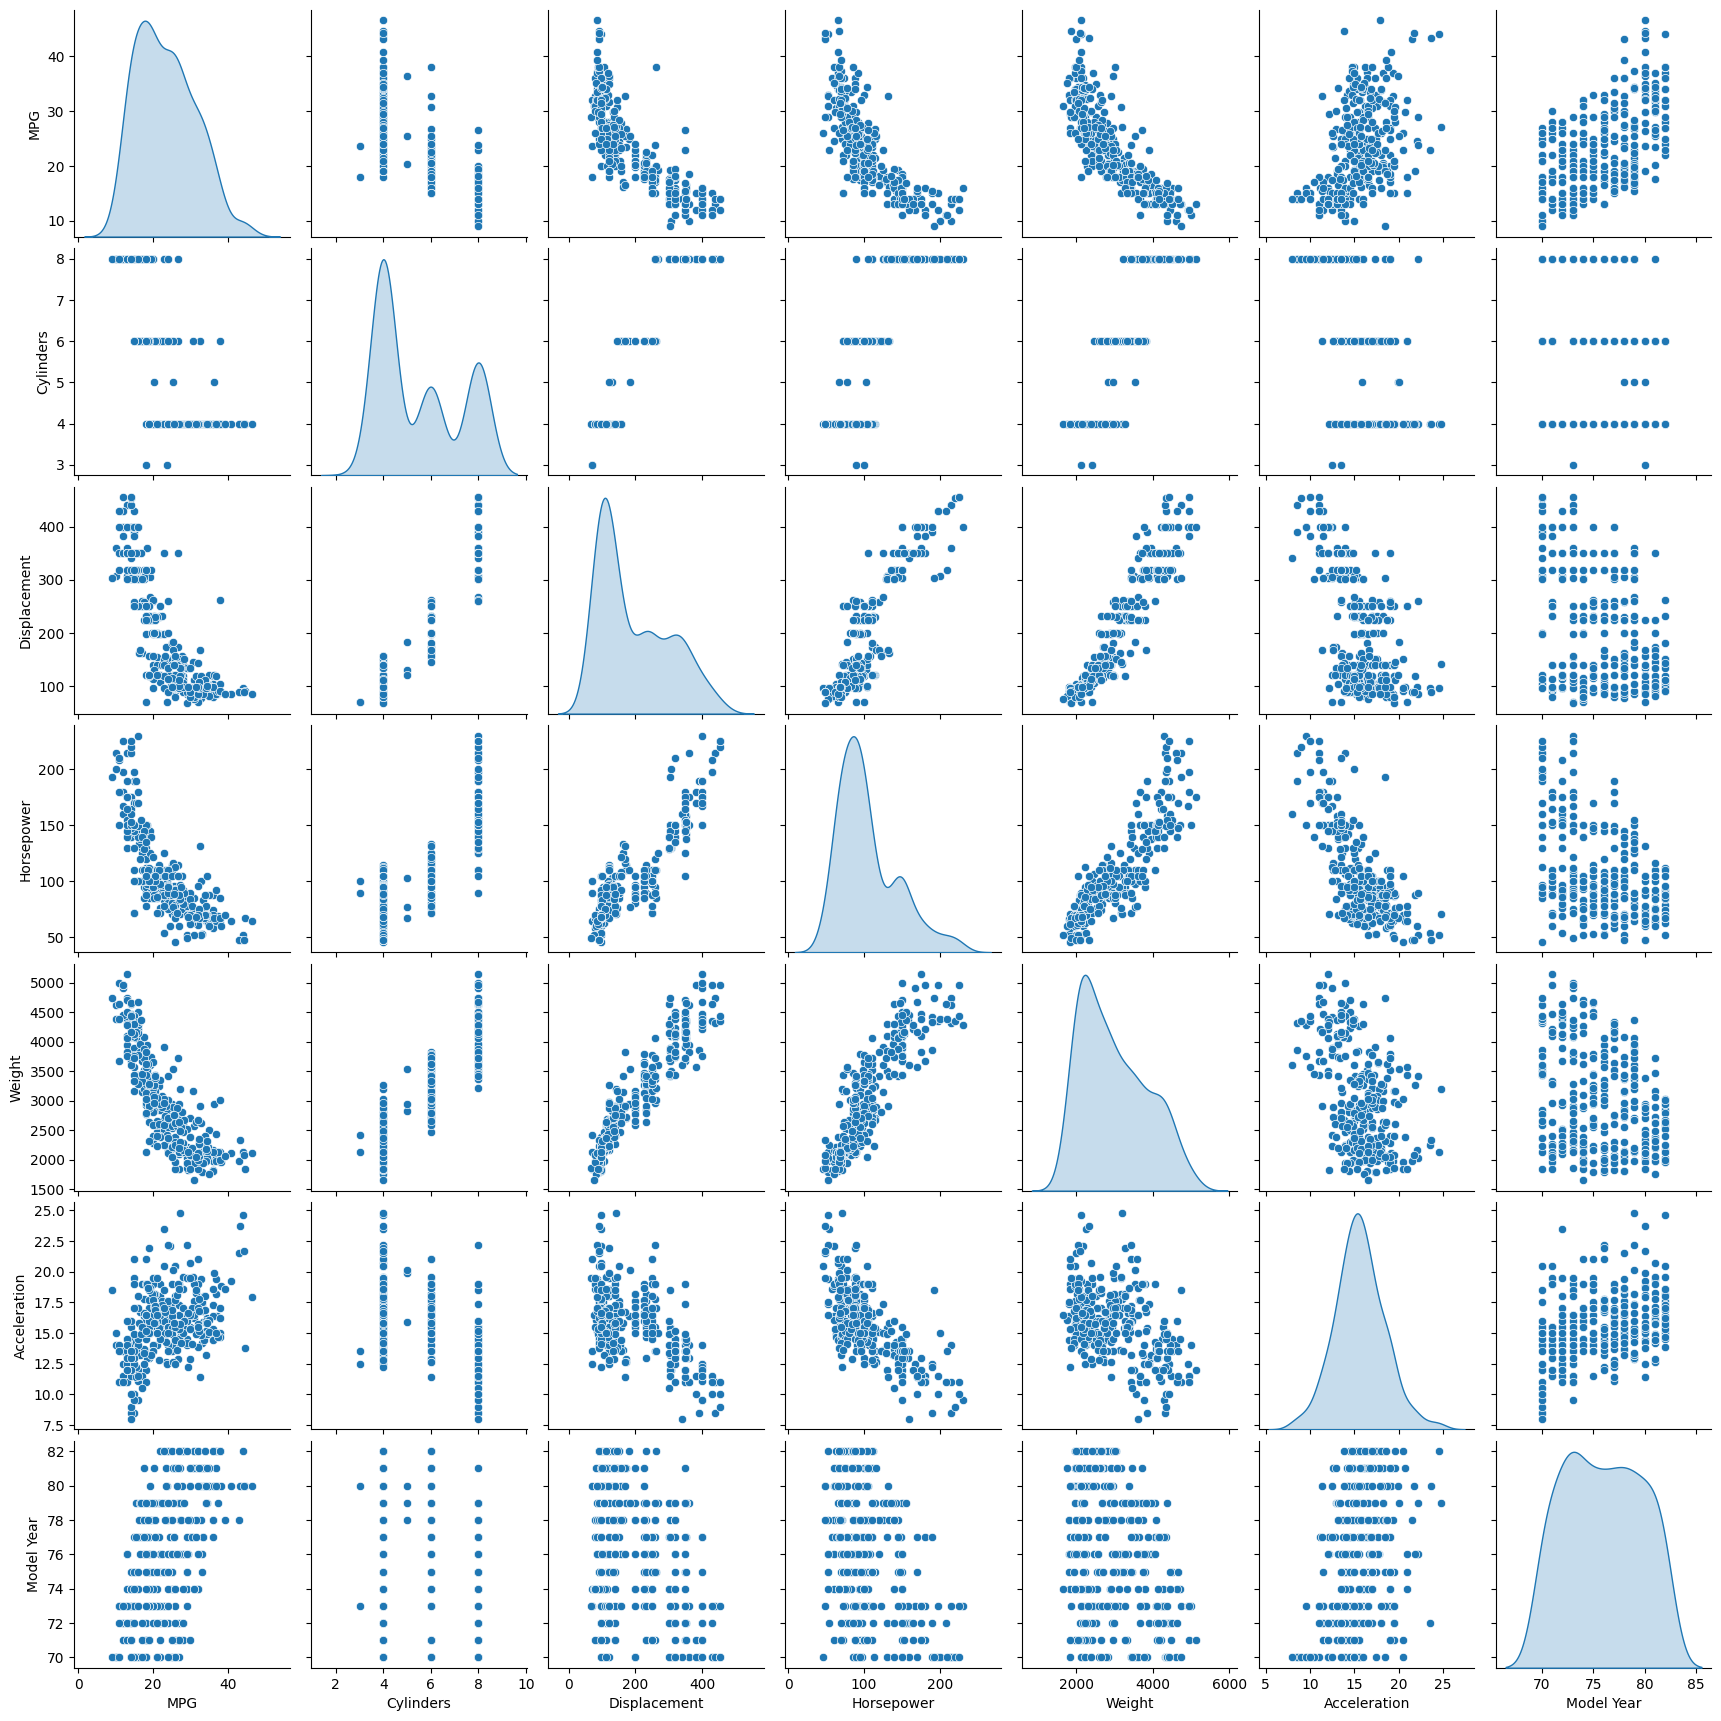

In [92]:
sns.pairplot(df_train[["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year"]], diag_kind="kde")

Tambien revise las estadisticas generales:

In [93]:
df_train.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
count,318.000000,318.000000,318.00000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,23.456289,5.487421,195.08805,104.692925,2983.591195,15.632704,75.946541,0.179245,0.198113,0.622642
std,7.852373,1.708625,105.71949,39.265834,860.538663,2.801216,3.711221,0.384162,0.399206,0.485490
min,9.000000,3.000000,68.00000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.125000,4.000000,100.25000,75.000000,2220.750000,14.000000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.00000,95.000000,2818.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,29.000000,8.000000,293.25000,128.000000,3627.500000,17.275000,79.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.00000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


### Separa las features del target

Separe el target de las features.

In [94]:
df_train = df_train.drop("MPG",axis=1)
df_test = df_test.drop("MPG",axis=1)

### Estandariza los datos

Es una buena práctica estandarizar funciones que utilizan diferentes escalas y rangos. Aunque el modelo podría converger sin estandarizar, dificulta el entrenamiento y hace que el modelo resultante dependa de la elección de las unidades utilizadas en la entrada.

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
standard = StandardScaler()
df_train_esc = standard.fit_transform(df_train)
df_test_esc = standard.fit_transform(df_test)

Estos datos estandarizados es lo que usaremos para entrenar el modelo.

## El modelo

### Construye el modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo.

Por tanto, tendrá tres capas. Una de entrada con activación relu. Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres para las dos primeras capas.

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`.

In [99]:
import tensorflow as tf
from tensorflow.keras import layers

In [111]:
model = keras.Sequential([
layers.Dense(128, activation='relu', input_shape=[9]),
layers.Dense(64, activation='relu'),
layers.Dense(32, activation='relu'),
layers.Dense(1)
])

model.compile(loss='mse',
            optimizer=tf.keras.optimizers.RMSprop(0.001),
            metrics=['mae', 'mse'])

### Inspeccione el modelo

Use el método `.summary` para imprimir una descripción simple del modelo

In [112]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenar el modelo

Entrene el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

NOTA: recuerda usar los datos normalizados.

In [113]:
history = model.fit(
  df_train_esc, 
  df_train,
  epochs=1000, 
  validation_split = 0.2, 
  verbose=0
)

Visualice el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`.

¿Alguna conclusión respecto a este gráfico?

Earlystopping me ha ayudado a detener el entrenamiento para no caer en overfitting, también para ahorrar recursos innecesarios.

Observamos que si le damos muchas epochs al entrenamiento tiende a un overfitting, siendo el error en validación cada vez más alto. Sería interesante utilizar un número aprox de 30 epochs

Añade un early stopping al modelo. Pon el argumento `callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]` dentro del fit().

Visualiza el progreso de entrenamiento.

Interpreta el gráfico

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

Ahora prueba el modelo. Coge 10 ejemplos de test y llama a` model.predict`.

### Haz Predicciones

Dibuja en un scatter plot las predicciones de test vs sus true labels.

Parece que nuestro modelo predice razonablemente bien. Echemos un vistazo a la distribución de errores.

Representa los residuos en un histograma

No es del todo gaussiano, pero podríamos esperar eso porque el número de muestras es muy pequeño.

Guarda tu modelo en un archivo.

## Conclusion